# Dimension Reduction on MNIST

## Uploading and visualization the MNIST Dataset

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings # Current version of Seaborn generates a bunch of warnings that will be ignored.
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# integrating dataset to python notebook
d0 = pd.read_csv('mnist_train.csv')
print(d0.head(5)) # checking the data

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
# separating the labels from the dataset
l = d0['label'] 
d = d0.drop('label',axis = 1)

In [4]:
# confriming with the shapes
print(l.shape)
print(d.shape)

(42000,)
(42000, 784)


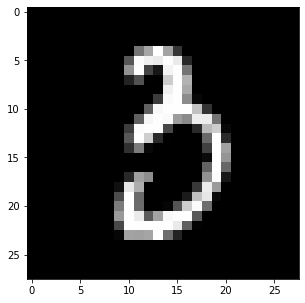

The above values is 3


In [5]:
# ploting a sample number visually
plt.figure(figsize=(5,5))
idx = 150

grid_data=d.iloc[idx].values.reshape(28,28) # reshaping from 1d to 2d
plt.imshow(grid_data,interpolation='none',cmap='gray')
plt.show()

print('The above values is',l[idx])

## 2 D visualization of MNIST manually

In [6]:
# Creating 15k data set with its labels
label = l.head(15000)
data = d.head(15000)
print('The shape of data is ',data.shape)

The shape of data is  (15000, 784)


### Data-preprocessing : standardizing tha dataset

In [7]:
from sklearn.preprocessing import StandardScaler
standard_data = StandardScaler().fit_transform(data)
print(standard_data.shape)

(15000, 784)


In [8]:
# creating same data sample for co-variance matrix : A^T * A
sample_data = standard_data

# Matrix multiplication with numpy
covar_matrix = np.matmul(sample_data.T,sample_data)
print('The shape of co-variance matrix = ',covar_matrix.shape)

The shape of co-variance matrix =  (784, 784)


In [9]:
# working with eigen-vectors and eigen-values
from scipy.linalg import eigh # from scipy of linear algebra
values, vectors = eigh(covar_matrix,eigvals=(782,783)) # returns the values and vectors from co-var matrix, top two(782,783)
print('The shape of eigen vectors is ', vectors.shape)
vectors = vectors.T
print('The updated shape of eigen vectors is',vectors.shape)

The shape of eigen vectors is  (784, 2)
The updated shape of eigen vectors is (2, 784)


In [10]:
# reducing the dimentions of 784-d data set into 2-d data set by the above eigen vector
new_coordinates = np.matmul(vectors,sample_data.T)
print('The resultent new data points\' shape is ', vectors.shape, 'X', sample_data.T.shape, '=', new_coordinates.shape)

The resultent new data points' shape is  (2, 784) X (784, 15000) = (2, 15000)


In [11]:
# appending labels with new data set of 2d projection
new_coordinates = np.vstack((new_coordinates,label)).T

In [12]:
print('The shape of new data set is ',new_coordinates.shape)

The shape of new data set is  (15000, 3)


In [13]:
# Creating the data frame
matrix_df = pd.DataFrame(data= new_coordinates,columns=('1st_principal','2nd_principal','labels'))
print(matrix_df.head(5))

   1st_principal  2nd_principal  labels
0      -5.558661      -5.043558     1.0
1       6.193635      19.305278     0.0
2      -1.909878      -7.678775     1.0
3       5.525748      -0.464845     4.0
4       6.366527      26.644289     0.0


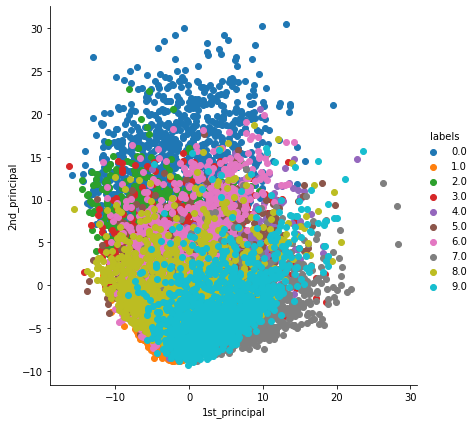

In [14]:
sn.FacetGrid(matrix_df,hue='labels',size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

## 2 D visualization of MNIST using PCA

In [15]:
# using SKlearn importing PCA
from sklearn import decomposition
pca = decomposition.PCA()

## PCA for dimensionality redcution (not for visualization)

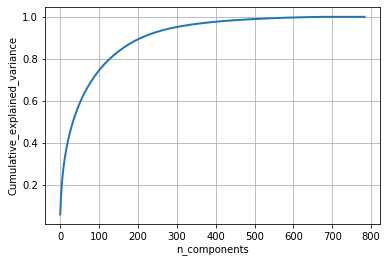

In [25]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

In [16]:
# directly entering parameters 
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print('shape of pca_reduced data = ',pca_data.shape)

shape of pca_reduced data =  (15000, 2)


In [17]:
# Data massaging - adding label colomn to the reduced matrix
pca_data = np.vstack((pca_data.T,label)).T

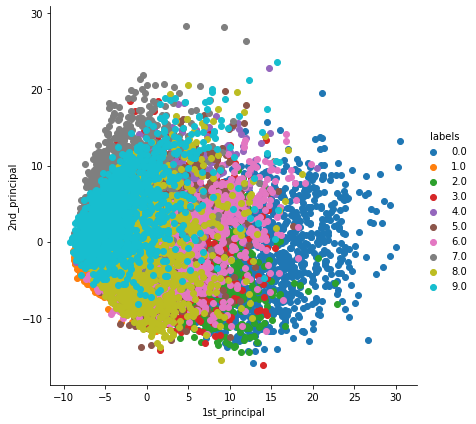

In [18]:
# dataframing and plotting the pca data
pca_df = pd.DataFrame(data=pca_data,columns=('1st_principal','2nd_principal','labels'))
sn.FacetGrid(pca_df,hue='labels',size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

## Data visualization using t-SNE

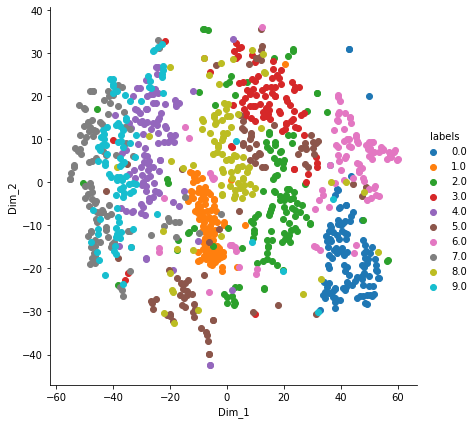

In [19]:
from sklearn.manifold import TSNE

# picking 1000 datapoints
data_1000 = standard_data[0:1000,:]
label_1000 = label[0:1000]

# designing model with default values perplexity = 30, n_iteration = 1000
model = TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(data_1000)

tsne_data = np.vstack((tsne_data.T,label_1000)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=('Dim_1','Dim_2','labels'))
sn.FacetGrid(tsne_df,hue='labels',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

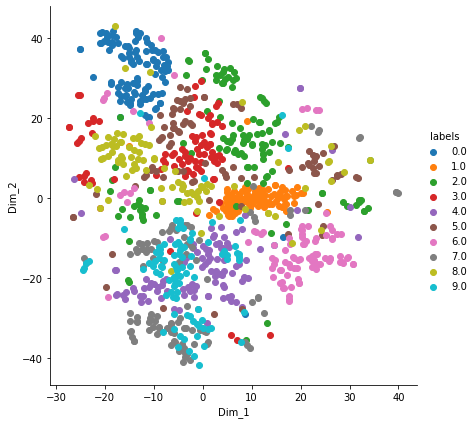

In [20]:
# Designing model with perpelexity = 50

model = TSNE(n_components=2,perplexity=50,random_state=0)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T,label_1000)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=('Dim_1','Dim_2','labels'))
sn.FacetGrid(tsne_df,hue='labels',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

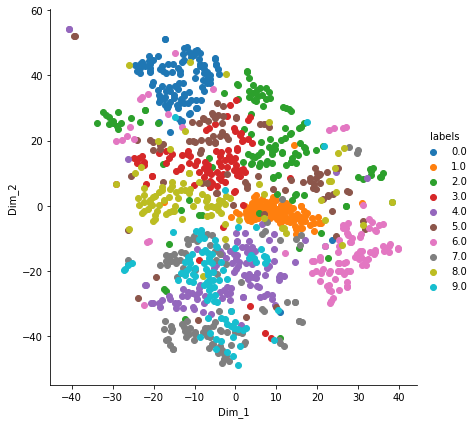

In [21]:
# Designing the model with perplexity = 50 and iteration  = 5000

model = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T,label_1000)).T
tsne_df = pd.DataFrame(data= tsne_data,columns=('Dim_1','Dim_2','labels'))
sn.FacetGrid(tsne_df,hue='labels',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

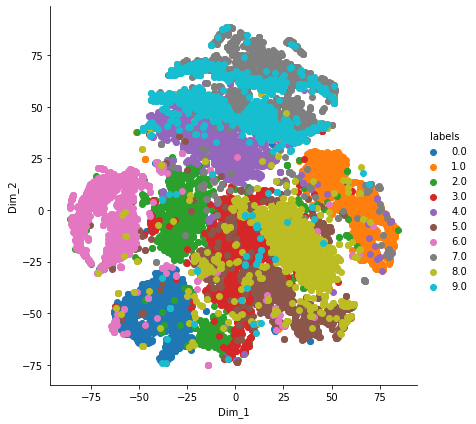

In [22]:
# building models with 15k data set
data_15k = standard_data[0:15000,:]
label_15k = label[0:15000]

model = TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(data_15k)
tsne_data = np.vstack((tsne_data.T,label_15k)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=('Dim_1','Dim_2','labels'))
sn.FacetGrid(tsne_df,hue='labels',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

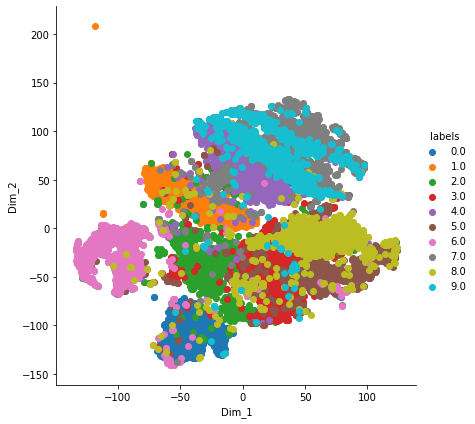

In [23]:
# Data modeling with 15k Training data set and 5000 
model =  TSNE(n_components=2,random_state=0,perplexity=40,n_iter=5000)
tsne_data = model.fit_transform(data_15k)
tsne_data = np.vstack((tsne_data.T,label_15k)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=('Dim_1','Dim_2','labels'))
sn.FacetGrid(tsne_df,hue='labels',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

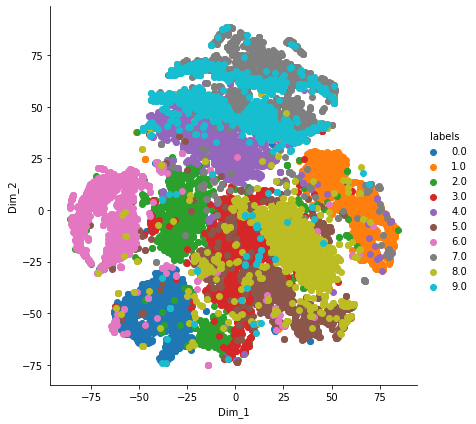

In [24]:
# Data modeling with whole Training data set(42k)
data_42k = standard_data
label_42k = label
model = TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(data_42k)
tsne_data = np.vstack((tsne_data.T,label_42k)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=('Dim_1','Dim_2','labels'))
sn.FacetGrid(tsne_df,hue='labels',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()